# Libraries

In [67]:
import sys
sys.path.append("../")

In [68]:
# for working with data
import pandas as pd
import numpy as np
from src.data_exploration import explore_functions as explr

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")

# Implementation

In [69]:
def check_balance(data, target, chart_types="pie", normalize=True, positive_target=0):
    target_counts = data[target].value_counts()
    target_counts.index = ["non-default" if i==positive_target else "default" for i in target_counts.index] 
    # sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index)
    if chart_types == "pie":
        plt.pie(target_counts.values, labels=target_counts.index, normalize=normalize, startangle=90,
            autopct="%1.1f%%", explode=[0, 0.1])
    elif chart_types == "bar":
        sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, palette="tab10")
        plt.xlabel("Targets")
    plt.title("Distribution of Targets")
    plt.show()

def distribution_barplot(data, feature, normalize=True, title=None, legend="auto", labels=None):
    feature_count = data[feature].value_counts(normalize=normalize).reset_index()
    sns.barplot(x=feature_count[feature], y=feature_count.iloc[:, 1], hue=feature_count.iloc[:, 0],
                palette="Set2", legend=legend)      
    plt.xlabel(feature)
    plt.title(f"Distribution of {feature}")

def distitribution_otherbased(data, dist_feature, base_feature, normalize=False):
    dist = data.groupby(by=base_feature, as_index=False)[dist_feature].value_counts(normalize=normalize)
    sns.barplot(x=dist[base_feature], y=dist.iloc[:, -1], hue=dist[dist_feature])
    if normalize:
        plt.ylim(0, 1.05)

# Load Data

In [70]:
data = pd.read_excel("../data/taiwan_default_payments.xls", header=1)

# Data Descrription

This data is the payment data in October, 2005, from an important bank (a cash and credit card issuer) in Taiwan and the targets were credit card holders of the bank. It contains 30,000 observations and 23 features. The response variable of this data is the customer's default payment in October (Yes = 1, No = 0). The meaning of other variables are given below:

There are 25 variables:

* X1/LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2/SEX: Gender (1 = male; 2 = female).
* X3/EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X5: Age (year).
* X6 - X11/PAY_x: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6/PAY_0 = the repayment status in September, 2005; X7/PAY_2 = the repayment status in August, 2005;... X11/PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: 1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; ... 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* X12 - X17/BILL_AMTx: Amount of bill statement (NT dollar). X12/BILL_AMT1 = amount of bill statement in September, 2005; X13/BILL_AMT2 = amount of bill statement in August, 2005;... X17/BILL_AMT6 = amount of bill statement in April, 2005.
* X18 - X23/PAY_AMTx: Amount of previous payment (NT dollar). X18/PAY_AMT1 = amount paid in September, 2005; X19/PAY_AMT2 = amount paid in August, 2005;... X23/PAY_AMT6 = amount paid in April, 2005.

### Rename Columns for Easier Use

In [71]:
data.columns = data.columns.str.lower()
data = data.rename(columns={"default payment next month": "default", "sex": "gender", "pay_0": "pay_1"})
data = data[['default', 'id'] + list(data.columns[1:-1:])]
data.head()

,default,id,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


# Data Exploration

### Basic Information

In [72]:
print("Number of observation:", data.shape[0])
print("Number of features:", data.shape[1]-2)
print("Number of duplicated rows:", data.duplicated().sum())
data.head()

Number of observation: 30000
Number of features: 23
Number of duplicated rows: 0


,default,id,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


### Missing values

In [73]:
data.isnull().sum()

default      0
id           0
limit_bal    0
gender       0
education    0
marriage     0
age          0
pay_1        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
dtype: int64

### Categorical Features

All the categorical features of this data were previously converted into numeric manners. However, to make it easier to gain insights and find another way to encode categorical features, we will turn them back into their original meanings based on the information provided by I-Cheng Yeh, the collector of this data.

__Demographic Information__

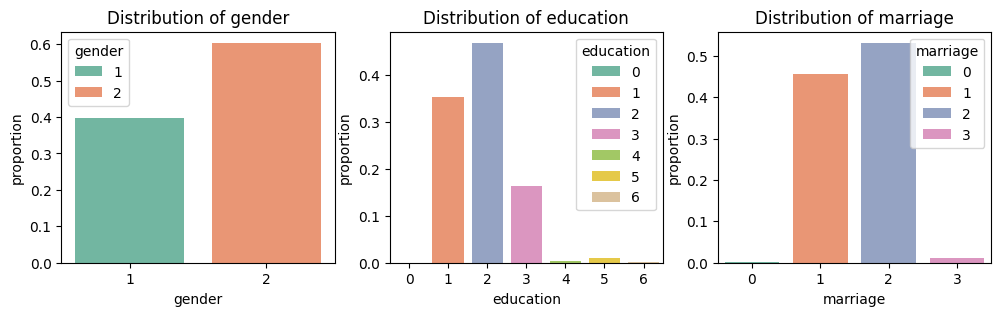

In [74]:
plt.figure(figsize=(12, 3))
cate_features = ["gender", "education", "marriage"]

for i in range(3):
    plt.subplot(1, 3, i+1)
    distribution_barplot(data, cate_features[i], normalize=True)

As we can see, the meaning of `0, 5, 6` values in `education` feature have not been documented yet. However, due to their relatively small proportions in the whole distribution, we can categorize them in the existing class "others". Dealing with the same problem with `marriage` feature, we can also put the undocumented value `0` into class "others"

In [75]:
data = data.replace({"gender": {1: "male", 2: "female"},
                     'education': {1: "graduate school", 2: "university", 3: "high school",
                                   0: "others", 4: "others", 5: "others", 6: "others"},
                     "marriage": {0: "others", 1: "married", 2: "single", 3: "others"}})
data.head()

,default,id,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,1,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


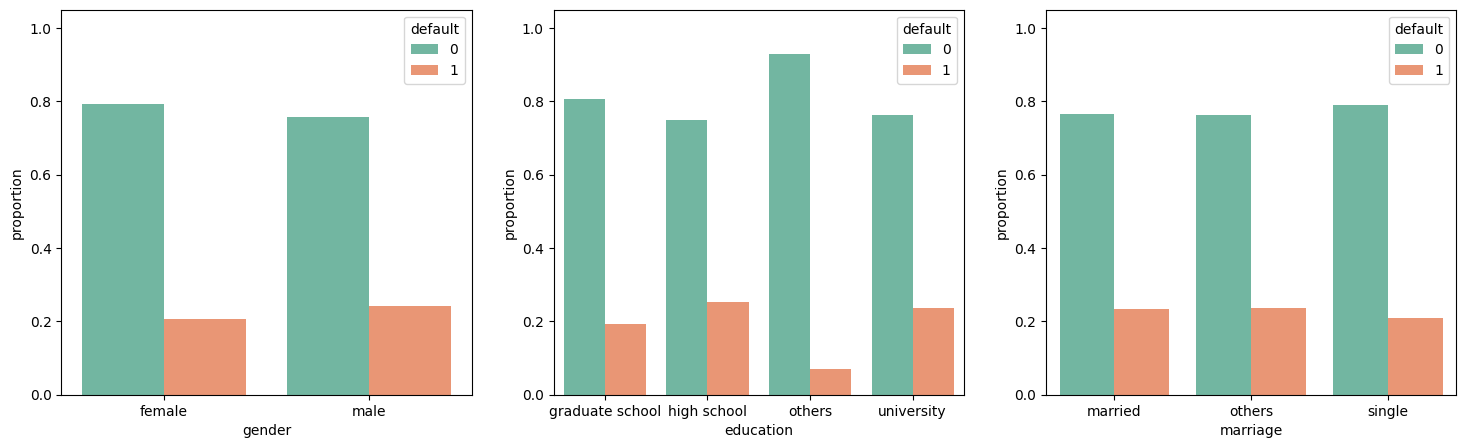

In [76]:
plt.figure(figsize=(18, 5))
cate_features = ["gender", "education", "marriage"]

for i in range(3):
    plt.subplot(1, 3, i+1)
    distitribution_otherbased(data, dist_feature="default", base_feature=cate_features[i], normalize=True)

__Repayment Status in Previous Months (From April to September)__

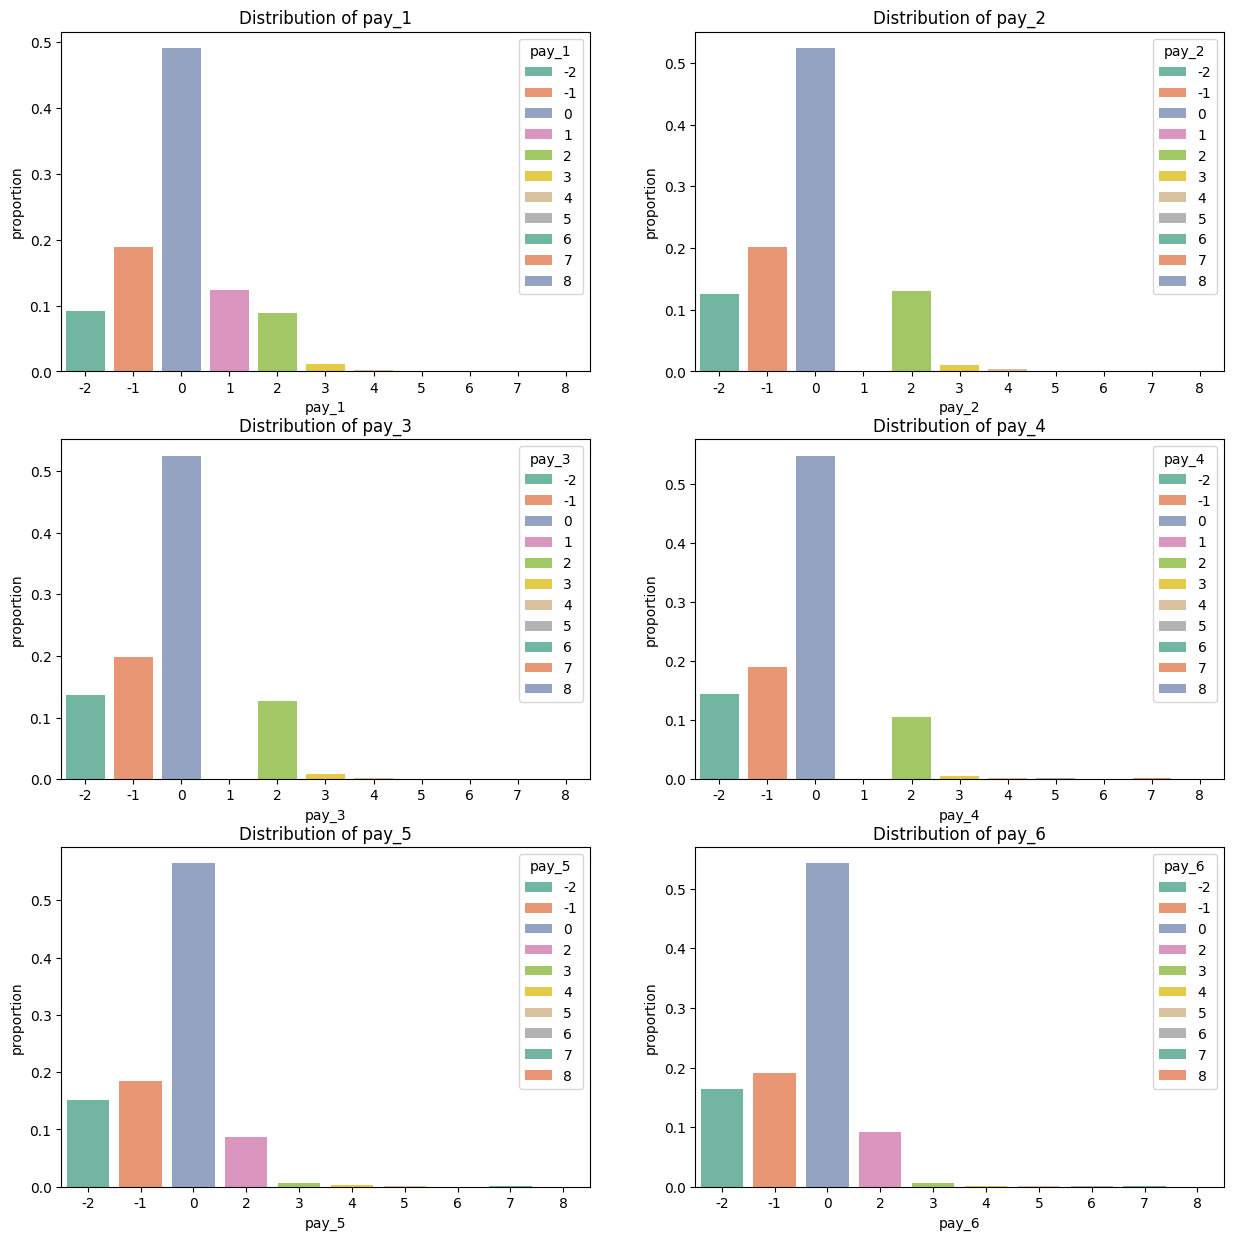

In [77]:
plt.figure(figsize=(15, 15))
cate_features = [f"pay_{i}" for i in range(1, 7, 1)]

for i in range(6):
    plt.subplot(3, 2, i+1)
    distribution_barplot(data, cate_features[i], normalize=True)

In `pay_x` features, there are also undocumented values, which are `0` and `-2` but in those cases, we can not simply add them to an existing classes due to their large proportions. Hence, to preserve information, we will remain them as another particular status of repayment.

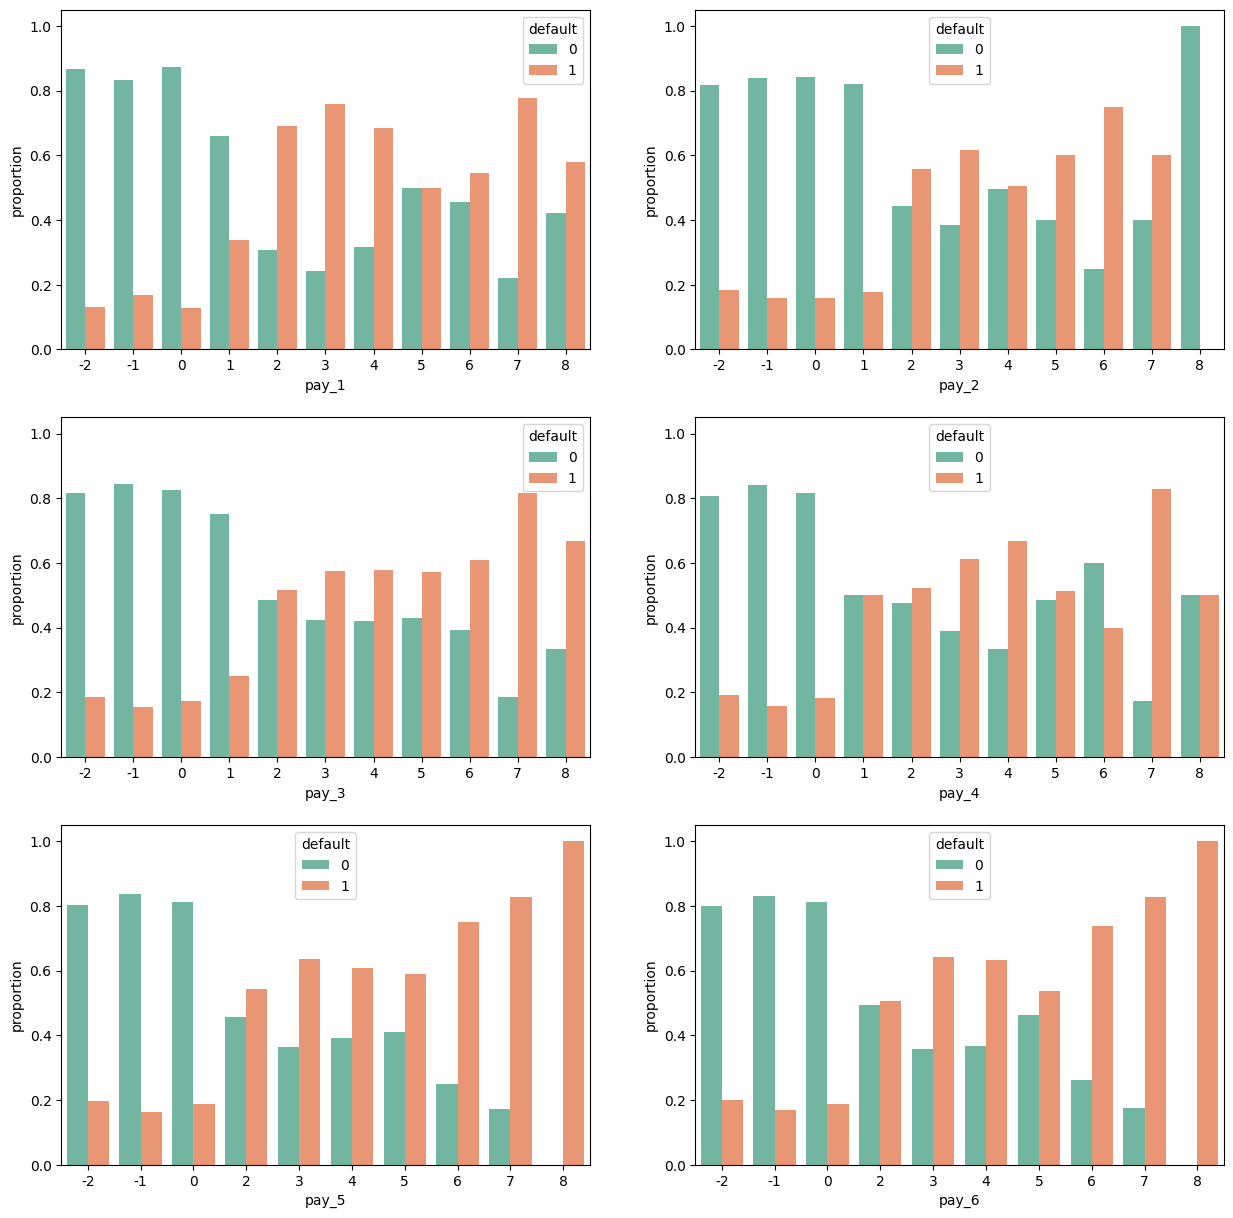

In [78]:
plt.figure(figsize=(15, 15))
cate_features = [f"pay_{i}" for i in range(1, 7, 1)]

for i in range(6):
    plt.subplot(3, 2, i+1)
    distitribution_otherbased(data, dist_feature="default", base_feature=cate_features[i], normalize=True)
    # distribution_barplot(data, cate_features[i], normalize=True)

When examining the percentage distribution of the target variable corresponding to each value in the feature `pay_x`, it becomes evident that for statuses `-2`, `-1`, and `0`, the proportion of default users is significantly lower than the rates of non-default. Conversely, for other statuses, an opposite trend emerges, notably with defaulters comprising a higher percentage compared to non-defaulters.
Based on this observation, we can come to two conclusions:
* Status `-2` and `0` might share a similar connotation with status `-1`, potentially indicating a "duly paid" status, to some degree.
* The information provied by the `pay_x` features appears to effectively discriminate between default and non-default users, owing to the distinct patterns exhibited by the two major types of repayment statuses.

Because the repayment status features were numerically scaled, so I can also treat them as numerical features

### Numerical Features

In [79]:
num_feas = ['age']+list(data.columns[13:])
data[num_feas].describe()

,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


__DEMOGRAPHIC FEATURES__

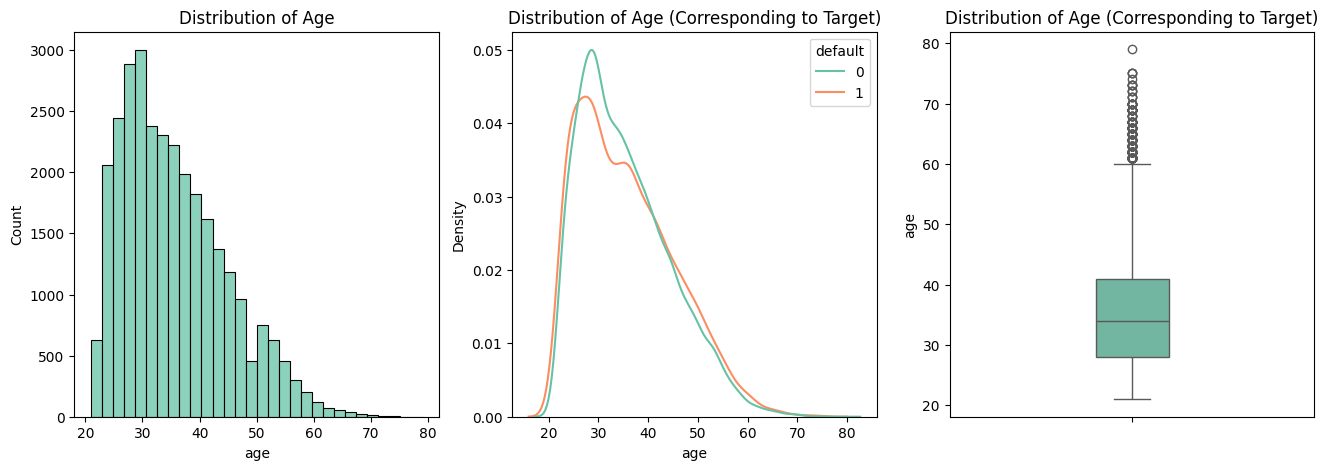

In [88]:
plt.figure(figsize=(16, 5))

for i in range(1, 4):
    if i==1:
        plt.subplot(1, 3, i)
        sns.histplot(data['age'], bins=30)
        plt.title("Distribution of Age")
    elif i==2:
        plt.subplot(1, 3, i)
        sns.kdeplot(data[['default', 'age']], x="age", hue="default", common_norm=False)
        plt.title("Distribution of Age (Corresponding to Target)")
    else:
        plt.subplot(1, 3, i)
        sns.boxplot(data['age'], width=0.2)
        plt.title("Distribution of Age (Corresponding to Target)")

In [81]:
age_fea = data[['default', 'id', 'age']].copy()
age_bins = {1: "under 20",
            2: "20 - 30",
            3: "30 - 40",
            4: "40 - 50",
            5: "50 - 60",
            6: "over 60"}
age_fea['age_bins'] = age_fea['age'].apply(lambda x: age_bins[x//10] if x//10<=6 else age_bins[6])

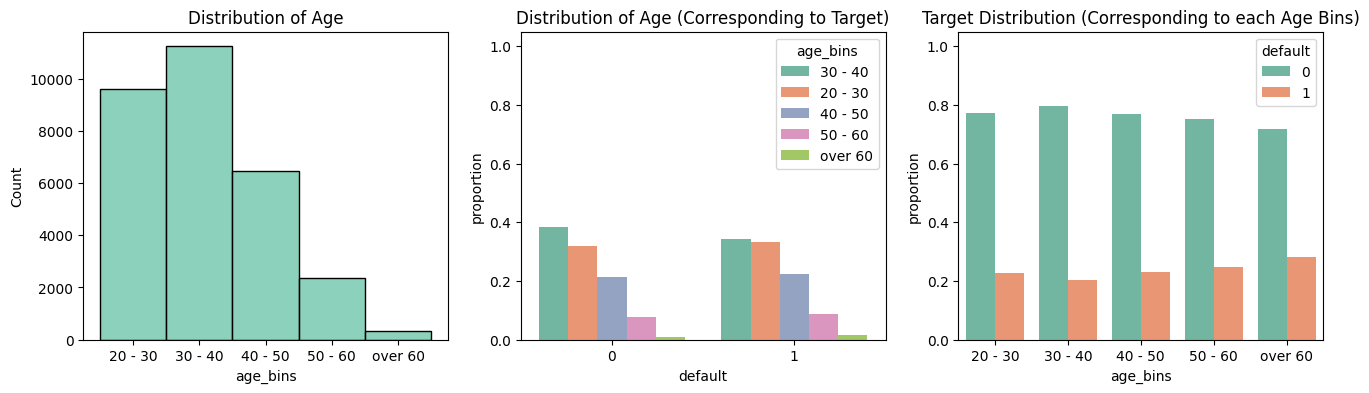

In [82]:
plt.figure(figsize=(16, 4))

for i in range(1, 4):
    if i==1:
        plt.subplot(1, 3, i)
        sns.histplot(age_fea['age_bins'].sort_values(), bins=30, )
        plt.title("Distribution of Age")
    elif i==2:
        plt.subplot(1, 3, i)
        distitribution_otherbased(age_fea, base_feature="default", dist_feature="age_bins", normalize=True)
        plt.title("Distribution of Age (Corresponding to Target)")
    else:
        plt.subplot(1, 3, i)
        distitribution_otherbased(age_fea, dist_feature="default", base_feature="age_bins", normalize=True)
        plt.title("Target Distribution (Corresponding to each Age Bins)")        

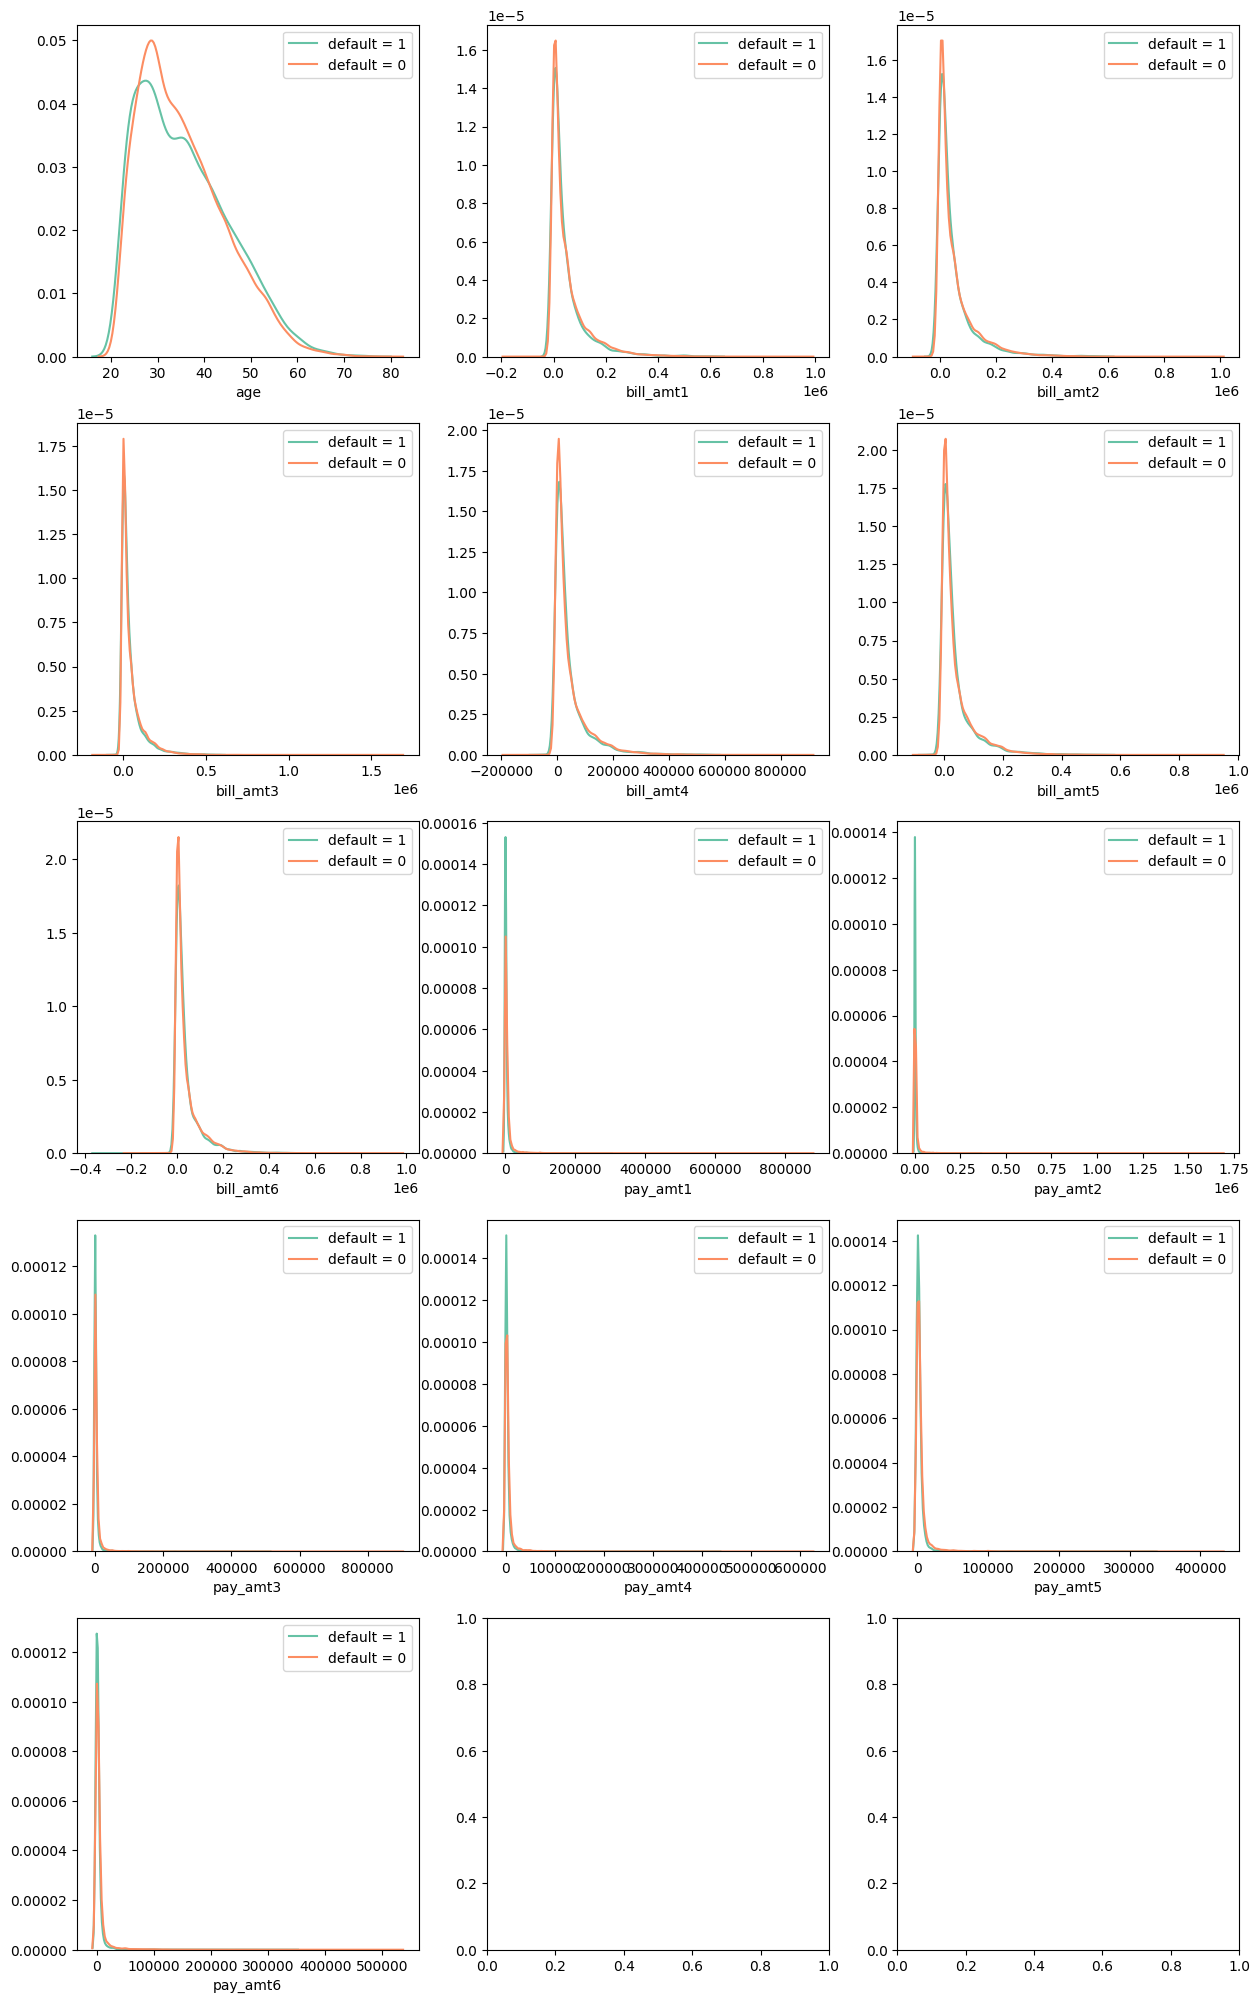

In [14]:
explr.num_kdeplot(data, cols=num_feas, color="default", nrows=5, ncols=3, figsize=(15, 25), limit=13)

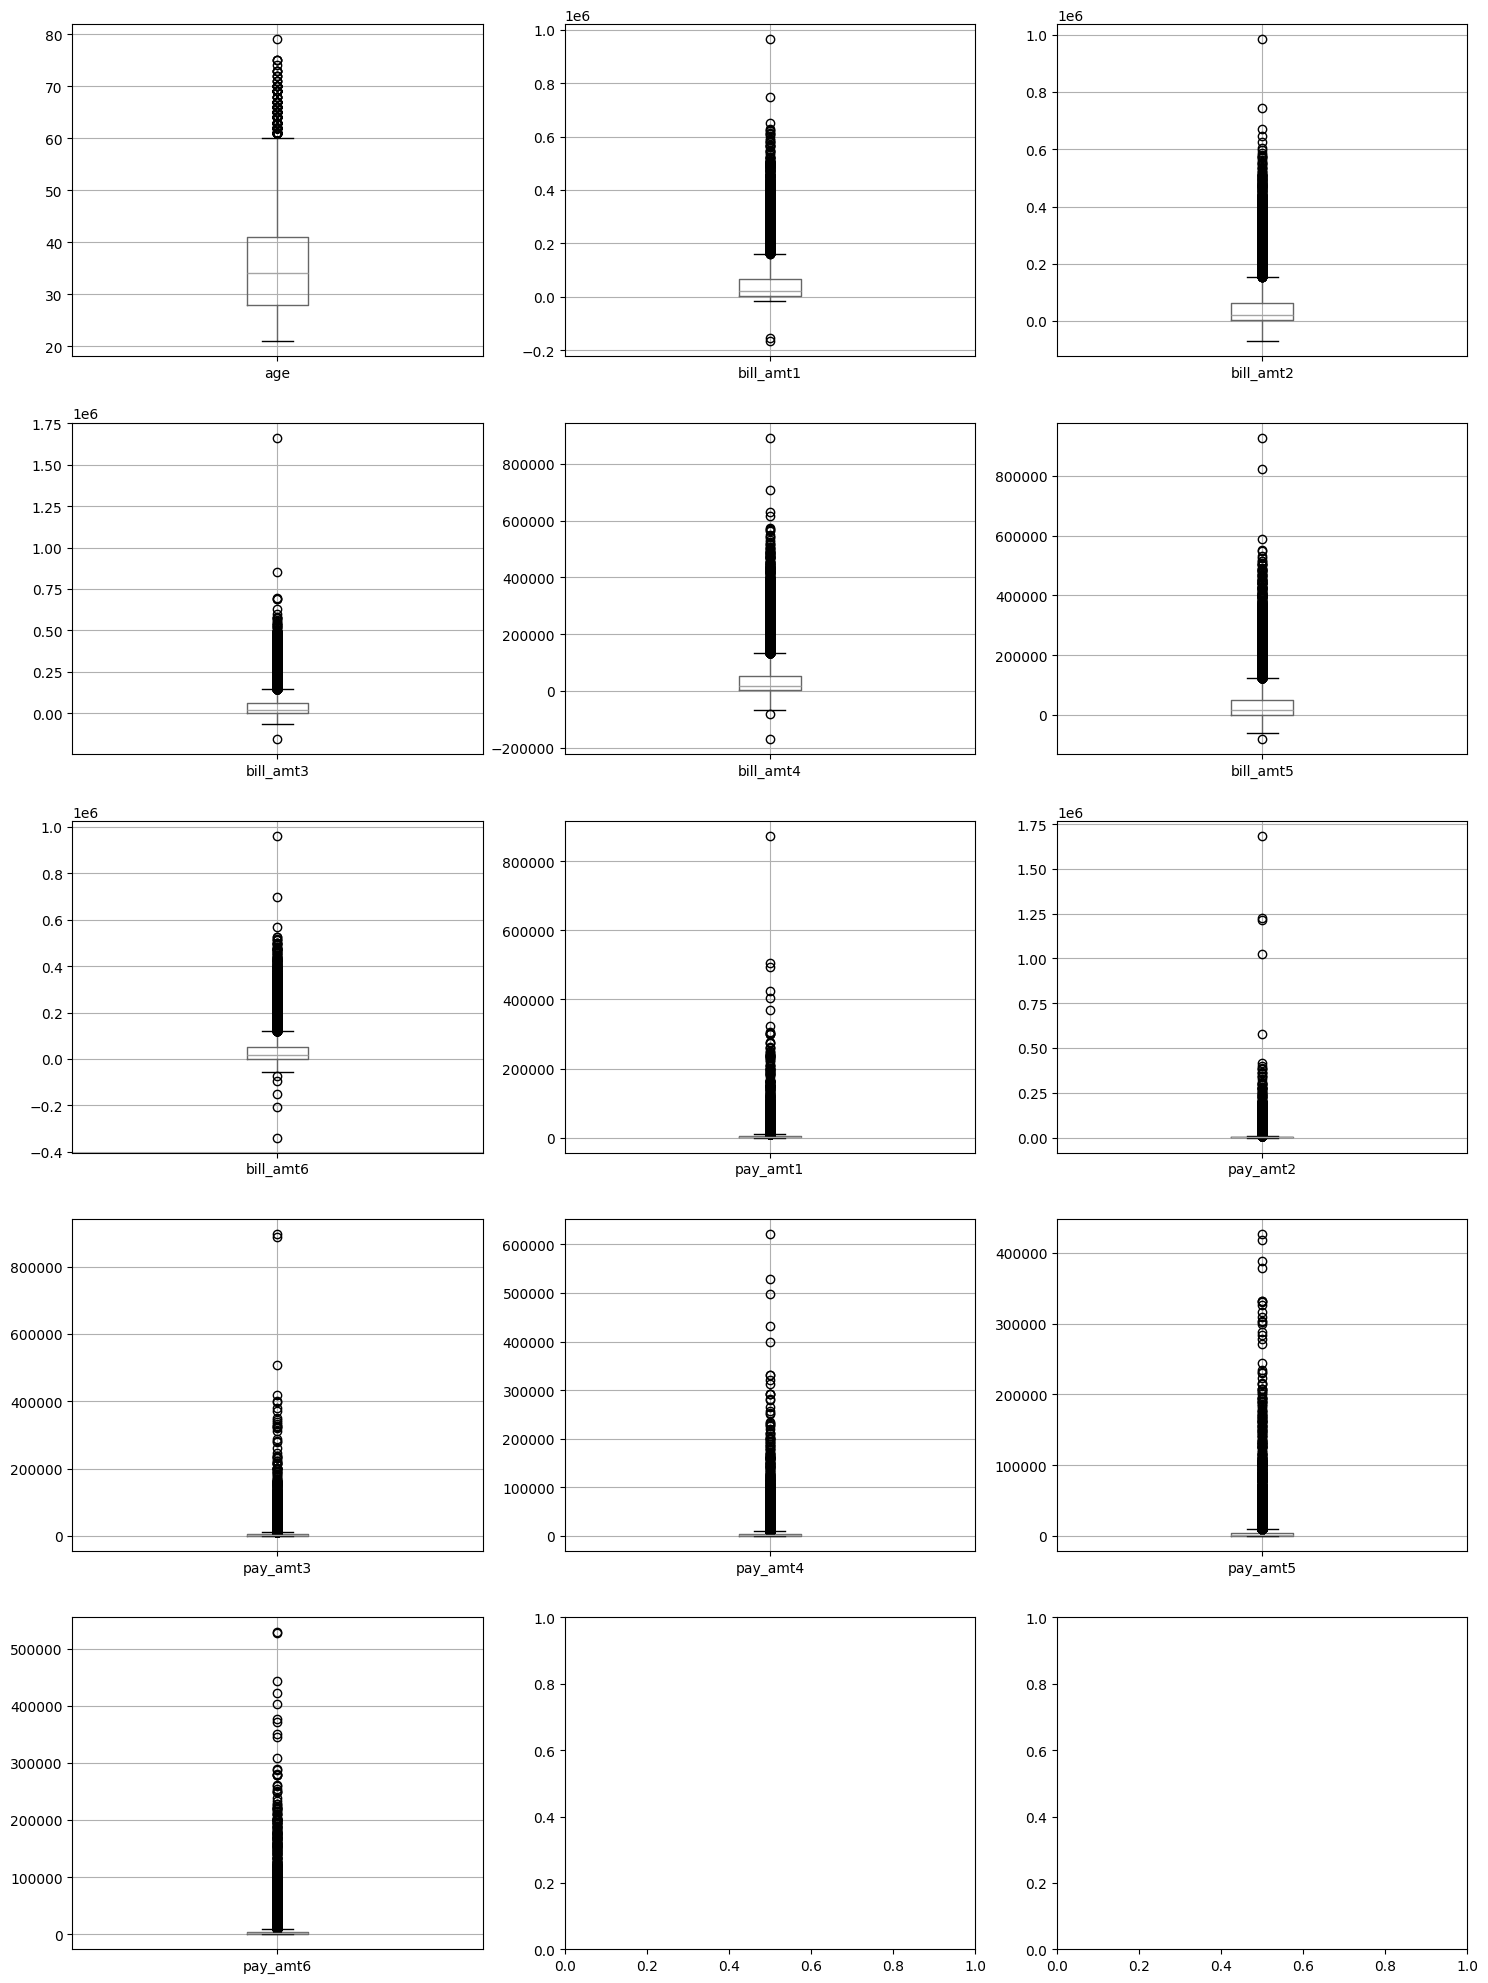

In [15]:
explr.num_dist_boxplot(data[num_feas], nrows=5, ncols=3, figsize=(18, 25), limit=13)

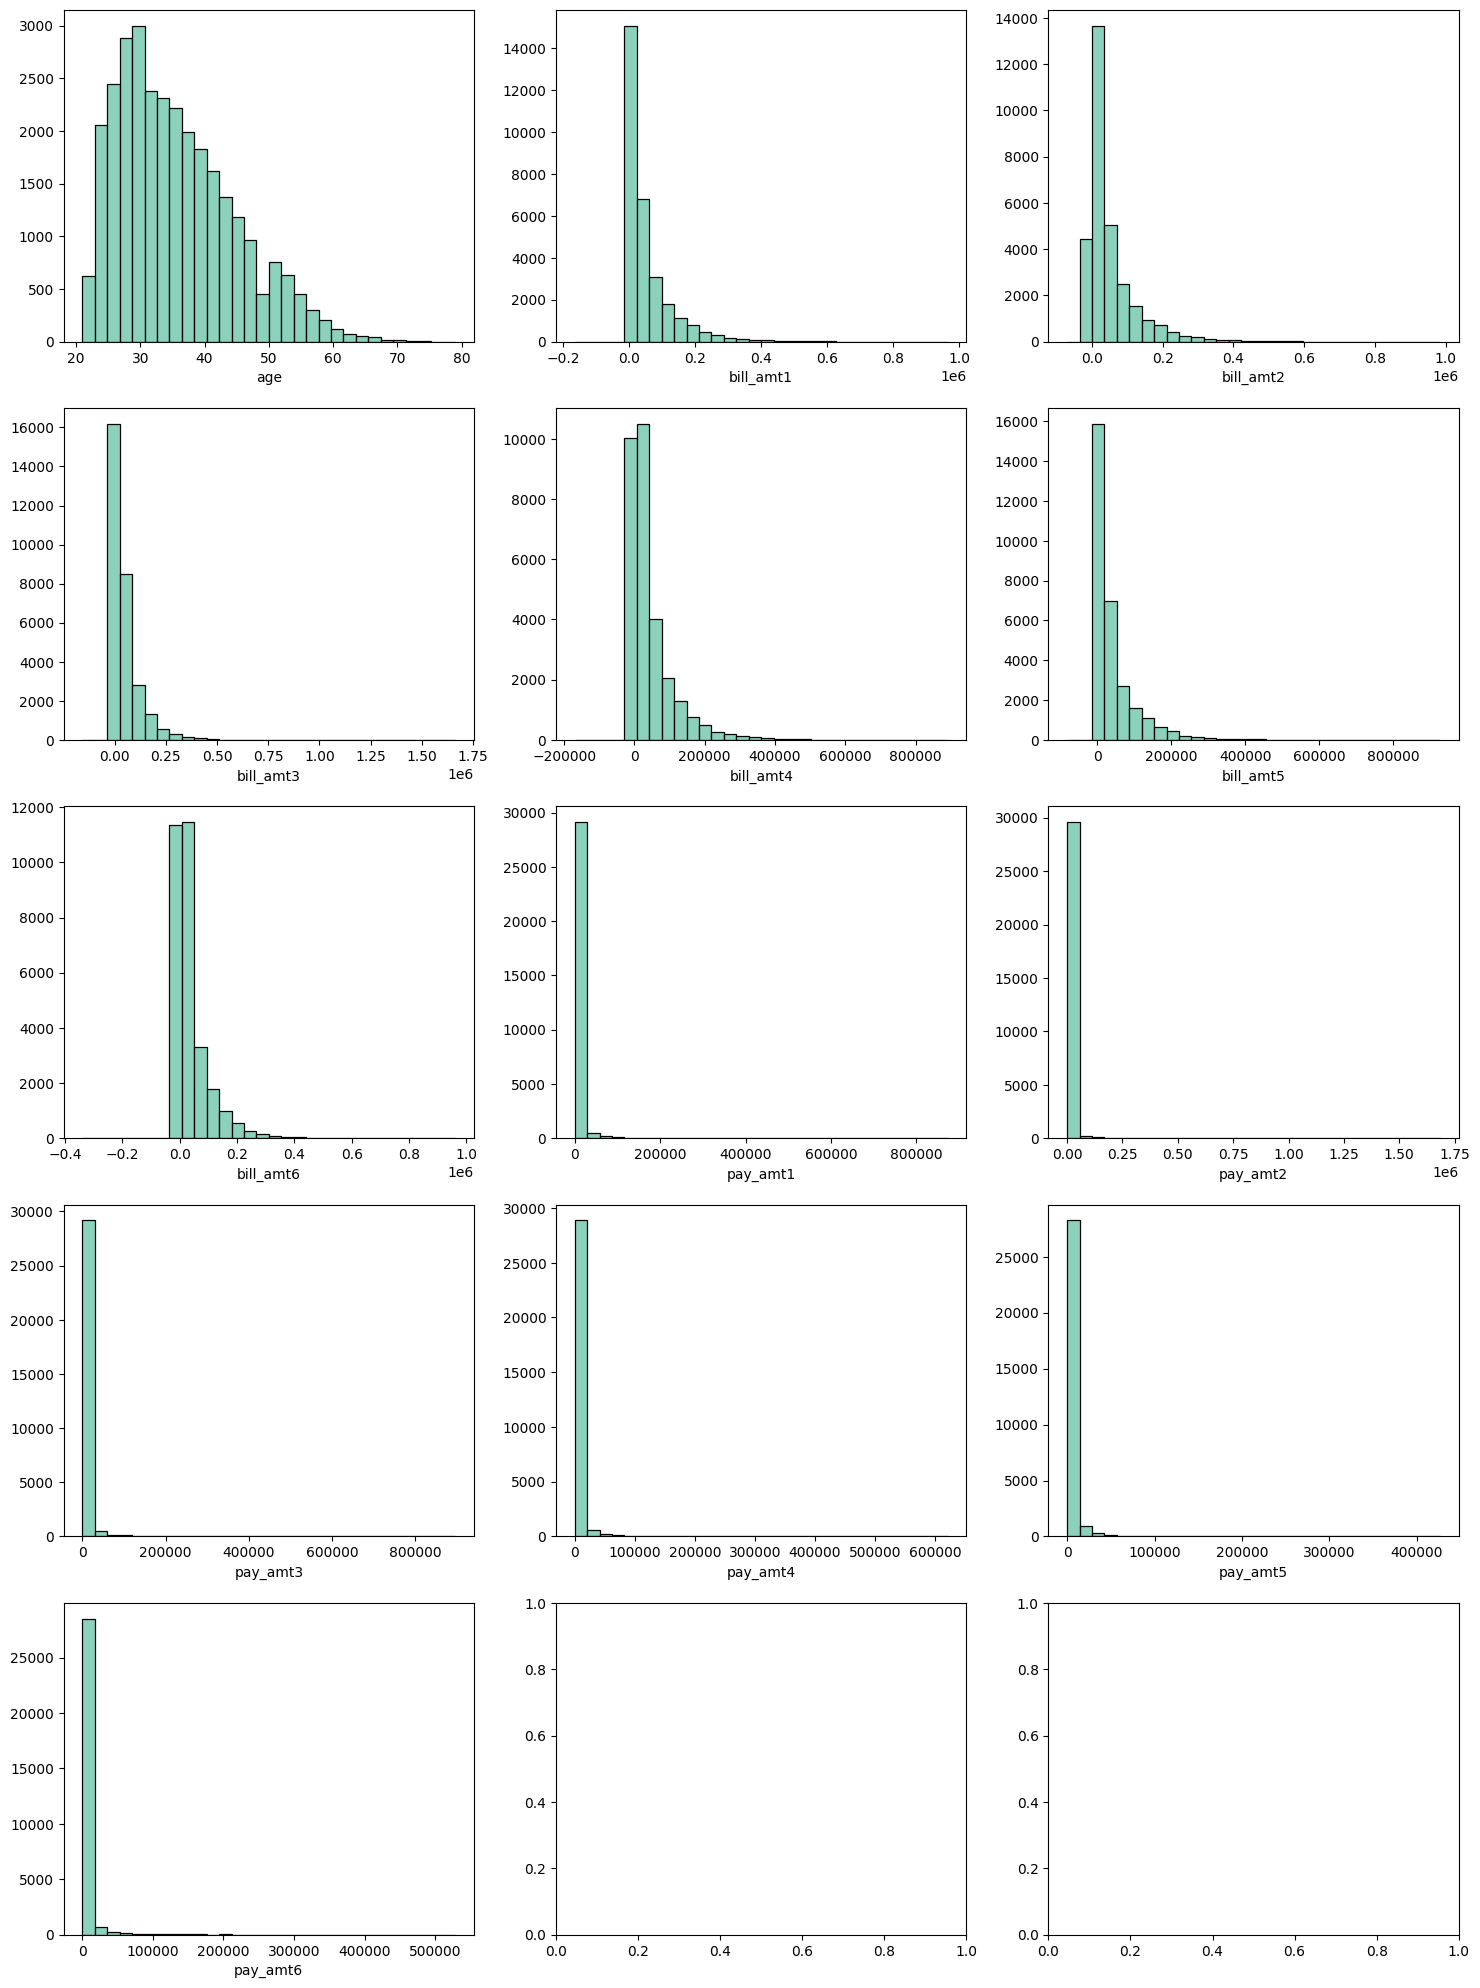

In [16]:
explr.num_dist_histplot(data[num_feas], nrows=5, ncols=3, figsize=(18, 25), limit=13)

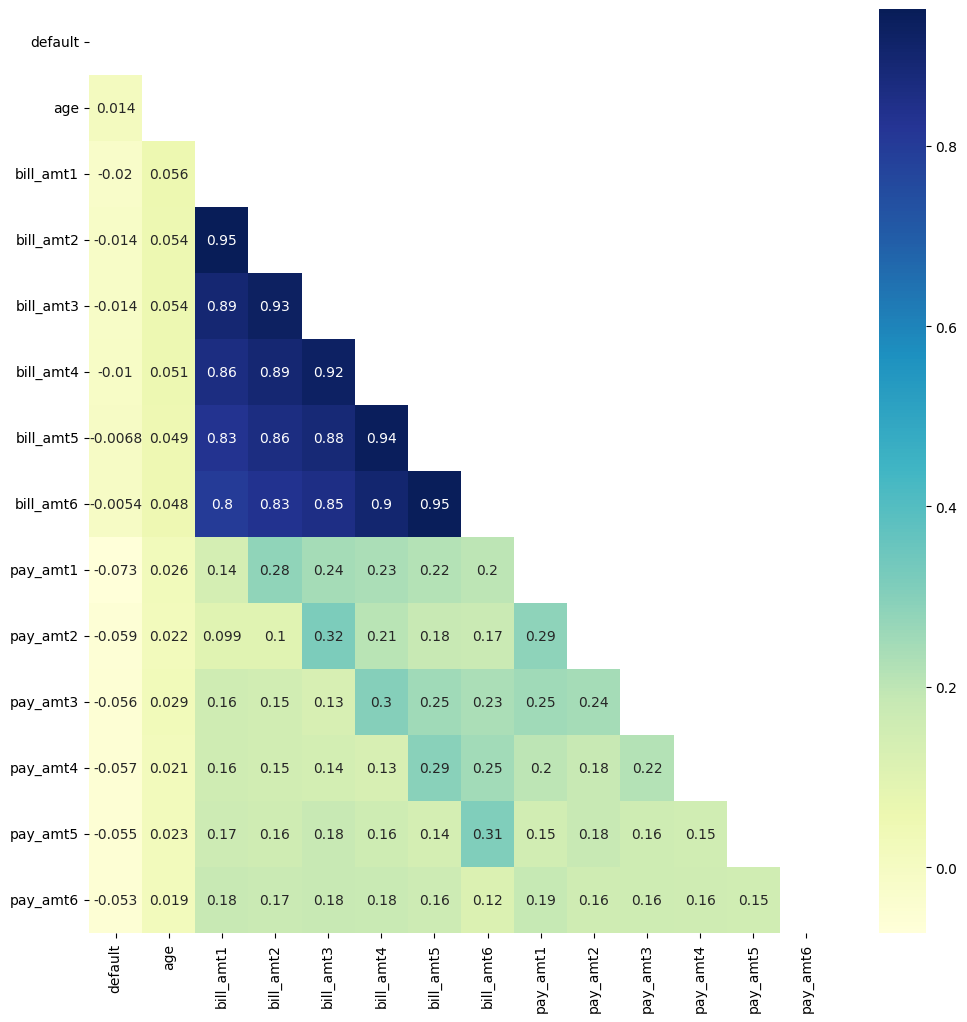

In [17]:
explr.check_corr(data[["default"]+num_feas], figsize=(12, 12))

In [18]:
# data.to_csv("org_taiwan.csv", index=False)